In [1]:
#Libraries
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import pandas as pd 
import pandas_datareader as web
import datetime as dt

# Download ETH-USD data from Yahoo finance
df1 = yf.download("BTC-USD", start="2017-01-01")
df1 = df1.reset_index()
df1 = df1.rename(columns = {'index':'Date'})
df1['Date'] = pd.to_datetime(df1['Date'])
df1.head()

[*********************100%***********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-01-01,963.658020,1003.080017,958.698975,998.325012,998.325012,147775008
1,2017-01-02,998.617004,1031.390015,996.702026,1021.750000,1021.750000,222184992
2,2017-01-03,1021.599976,1044.079956,1021.599976,1043.839966,1043.839966,185168000
3,2017-01-04,1044.400024,1159.420044,1044.400024,1154.729980,1154.729980,344945984
4,2017-01-05,1156.729980,1191.099976,910.416992,1013.380005,1013.380005,510199008


In [2]:
# Split the 'Date' column into two separate columns for date and time
df1['Date'] = df1['Date'].dt.date
df1['Time'] = pd.to_datetime(df1['Date']).dt.time
df1

,Date,Open,High,Low,Close,Adj Close,Volume,Time
0,2017-01-01,963.658020,1003.080017,958.698975,998.325012,998.325012,147775008,00:00:00
1,2017-01-02,998.617004,1031.390015,996.702026,1021.750000,1021.750000,222184992,00:00:00
2,2017-01-03,1021.599976,1044.079956,1021.599976,1043.839966,1043.839966,185168000,00:00:00
3,2017-01-04,1044.400024,1159.420044,1044.400024,1154.729980,1154.729980,344945984,00:00:00
4,2017-01-05,1156.729980,1191.099976,910.416992,1013.380005,1013.380005,510199008,00:00:00
...,...,...,...,...,...,...,...,...
2238,2023-02-17,23621.283203,24924.041016,23460.755859,24565.601562,24565.601562,41358451255,00:00:00
2239,2023-02-18,24565.296875,24798.835938,24468.373047,24641.277344,24641.277344,19625427158,00:00:00
2240,2023-02-19,24640.027344,25093.054688,24327.642578,24327.642578,24327.642578,25555105670,00:00:00
2241,2023-02-20,24336.623047,25020.458984,23927.910156,24829.148438,24829.148438,28987376573,00:00:00


In [3]:
# Drop the 'Time' and 'Adj Close' columns
data = df1.drop(['Time','Adj Close'], axis = 1)
data.head()

,Date,Open,High,Low,Close,Volume
0,2017-01-01,963.658020,1003.080017,958.698975,998.325012,147775008
1,2017-01-02,998.617004,1031.390015,996.702026,1021.750000,222184992
2,2017-01-03,1021.599976,1044.079956,1021.599976,1043.839966,185168000
3,2017-01-04,1044.400024,1159.420044,1044.400024,1154.729980,344945984
4,2017-01-05,1156.729980,1191.099976,910.416992,1013.380005,510199008


In [4]:
# Check for missing values
print(data.isnull().sum())
data.head()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64


,Date,Open,High,Low,Close,Volume
0,2017-01-01,963.658020,1003.080017,958.698975,998.325012,147775008
1,2017-01-02,998.617004,1031.390015,996.702026,1021.750000,222184992
2,2017-01-03,1021.599976,1044.079956,1021.599976,1043.839966,185168000
3,2017-01-04,1044.400024,1159.420044,1044.400024,1154.729980,344945984
4,2017-01-05,1156.729980,1191.099976,910.416992,1013.380005,510199008


In [5]:
# Compute RSI
rsi = ta.momentum.RSIIndicator(df['Close'], window=14)
df['rsi'] = rsi.rsi()

# Compute MACD
macd = ta.trend.MACD(df['Close'], window_slow=26, window_fast=12, window_sign=9)
df['macd'] = macd.macd()

# Use MinMaxscaler for scaling the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler. fit_transform(data['Close'].values.reshape (-1,1))
prediction_days = 200

In [6]:
# Train the dataset
x_train, y_train = [], []
for x in range(prediction_days, len(scaled_data)):
    x_train.append (scaled_data[x-prediction_days:x, 0])
    y_train.append(scaled_data[x, 0])
x_train, y_train = np.array (x_train), np.array (y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape [1], 1))


In [7]:
# Prepering the LSTM model
from tensorflow. keras. layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential

model = Sequential()

model.add(LSTM(units=50,activation = 'relu',return_sequences= True, input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60,activation = 'relu',return_sequences= True))
model.add(Dropout(0.3))

model.add(LSTM(units=80,activation = 'relu',return_sequences= True))
model.add(Dropout(0.4))

model.add(LSTM(units=120,activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))


In [8]:
# Compling the dataset and check the mean squared error 
model.compile(optimizer='Adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=25,batch_size=32)

Epoch 1/25
64/64 [==============================] - 63s 902ms/step - loss: 0.0237
Epoch 2/25
64/64 [==============================] - 62s 961ms/step - loss: 0.0066
Epoch 3/25
64/64 [==============================] - 62s 964ms/step - loss: 0.0066
Epoch 4/25
64/64 [==============================] - 60s 945ms/step - loss: 0.0053
Epoch 5/25
64/64 [==============================] - 65s 1s/step - loss: 0.0068
Epoch 6/25
64/64 [==============================] - 74s 1s/step - loss: 0.0050
Epoch 7/25
64/64 [==============================] - 64s 1s/step - loss: 0.0049
Epoch 8/25
64/64 [==============================] - 59s 923ms/step - loss: 0.0047
Epoch 9/25
64/64 [==============================] - 58s 905ms/step - loss: 0.0044
Epoch 10/25
64/64 [==============================] - 62s 966ms/step - loss: 0.0043
Epoch 11/25
64/64 [==============================] - 59s 908ms/step - loss: 0.0036
Epoch 12/25
64/64 [==============================] - 41s 641ms/step - loss: 0.0037
Epoch 13/25
64/64 [===

In [9]:
# model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 200, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 200, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 200, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 200, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 200, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 200, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [10]:
#model.save('keras_model.h5')

In [11]:
# Testing the dataset
test_data = data
actual_prices = test_data[ 'Close' ].values
total_dataset = pd.concat((data[ 'Close'], test_data[ 'Close' ]), axis=0)
model_inputs = total_dataset [len (total_dataset) - len(test_data) - prediction_days: ].values
model_inputs = model_inputs.reshape (-1, 1)
model_inputs = scaler.fit_transform(model_inputs)

In [12]:
# Predicting the price of testing dataset
x_test=[]
for x in range(prediction_days, len (model_inputs)):
    x_test.append(model_inputs[x-prediction_days:x, 0])

x_test = np.array(x_test)
x_test = np.reshape (x_test, (x_test.shape[0], x_test.shape [1], 1))   
prediction_prices = model.predict(x_test)
prediction_prices = scaler.inverse_transform(prediction_prices)


71/71 [==============================] - 14s 188ms/step


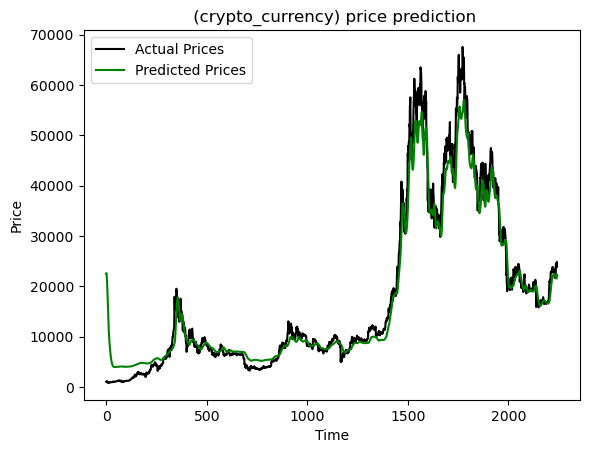

In [13]:
# Ploting the dataset with actual price and predicted price
plt.plot (actual_prices, color='black', label='Actual Prices') 
plt.plot (prediction_prices, color='green', label='Predicted Prices') 
plt.title (f' (crypto_currency) price prediction') 
plt.xlabel ('Days') 
plt.ylabel ('Price') 
plt.legend (loc='upper left') 
plt.show()



In [14]:
# Predict Next Day price
real_data = [model_inputs [len(model_inputs) + 1 - prediction_days:len (model_inputs) + 1, 0]]
real_data = np.array (real_data)
real_data = np.reshape (real_data, (real_data.shape [0], real_data.shape [1], 1))
prediction = model.predict (real_data)
prediction = scaler.inverse_transform(prediction)
print(prediction)

1/1 [==============================] - 1s 650ms/step
[[22529.518]]


In [15]:
print(actual_prices)


[  998.32501221  1021.75        1043.83996582 ... 24327.64257812
 24829.1484375  23948.59375   ]


In [16]:
print(prediction_prices)

[[22529.518]
 [22598.537]
 [22352.06 ]
 ...
 [21727.65 ]
 [21956.643]
 [22237.664]]
